<a href="https://colab.research.google.com/github/RomichTEST/ds_learning/blob/main/Base_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [13.0,5.0]

In [77]:
import torch

## **Train set**

Text(0.5, 1.0, '$y=sin(x)$')

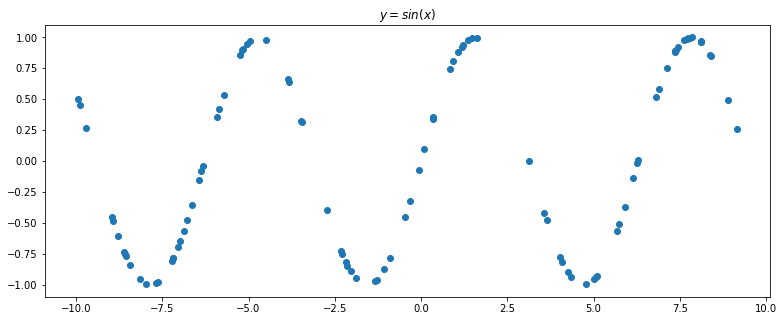

In [78]:
x_train = torch.rand(100)
x_train = x_train * 20 - 10

y_train = torch.sin(x_train)
plt.plot(x_train.numpy(),y_train.numpy(), 'o')
plt.title('$y=sin(x)$')

Text(0.5, 1.0, '$y=sin(x)$')

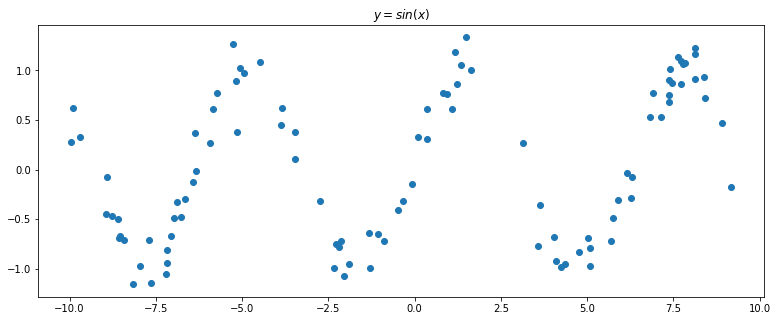

In [79]:
noise = torch.randn(y_train.shape) / 5.

y_train = y_train + noise
plt.plot(x_train.numpy(),y_train.numpy(), 'o')
plt.title('$y=sin(x)$')

In [80]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

## **Validation set**

Text(0.5, 1.0, 'val data')

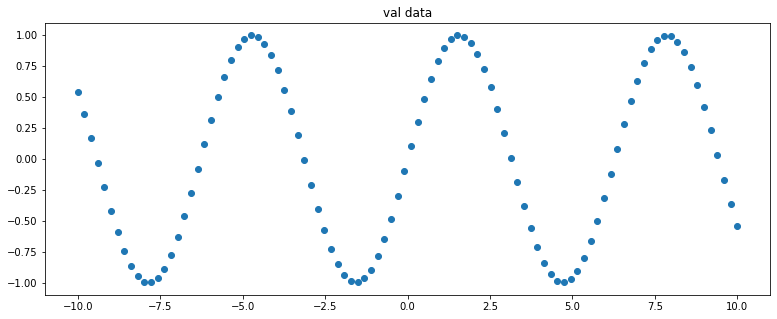

In [81]:
x_validation = torch.linspace(-10,10,100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(),y_validation.numpy(), 'o')
plt.title('val data')

In [82]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# **NN construction**

In [83]:
class SineNet(torch.nn.Module):
  def __init__(self,n_hidden_neurons):
    super(SineNet, self).__init__()
    self.fc1 = torch.nn.Linear(1,n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons,1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x

sine_net = SineNet(15)

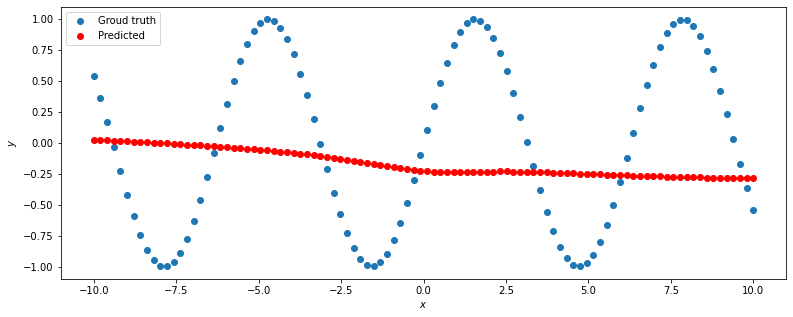

In [84]:
def predict(net, x, y):
  y_pred = net.forward(x)

  plt.plot(x.numpy(), y.numpy(), 'o', label = 'Groud truth')
  plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c = 'r', label = 'Predicted');
  plt.legend(loc = 'upper left')
  plt.xlabel('$x$')
  plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)


## **Optimizer**

In [85]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr = 0.01)

## **Loss function**

In [86]:
def loss(pred, target):
  mse = (pred - target) ** 2
  return mse.mean()

# **Training**

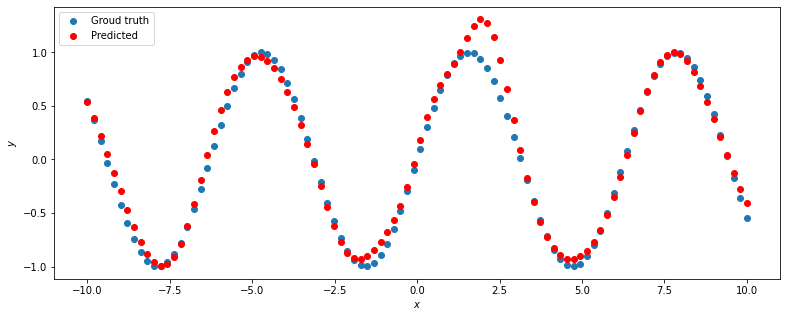

In [87]:
for epoch_index in range(2000):
  optimizer.zero_grad()

  y_pred = sine_net.forward(x_train)
  loss_val = loss(y_pred, y_train)

  loss_val.backward()

  optimizer.step()

predict(sine_net, x_validation, y_validation)

# **TEST TASK**

In [95]:
import torch

def target_function(x):
    return 2**x * torch.sin(2**-x)

class RegressionNet(torch.nn.Module):
    def __init__(self,n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1,n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons,1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

net = RegressionNet(10)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:


optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

def loss(pred, target):
  mae = (pred - target).abs()
  return mae.mean()

for epoch_index in range(1000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()

# Проверка осуществляется вызовом кода:
def metric(pred, target):
    return (pred - target).abs().mean()
#
print(metric(net.forward(x_validation), y_validation).item())
# (раскомментируйте, если решаете задание локально)

0.028467128053307533
